# **DYNAMICS PRICING**
**Alan Vladimir, Jesus Coss, Jesus F. Ortega**

_Equipo de analisis numerico_

## **1. Abstrac**

El siguiente proyecto esta dividido entres fases.
* **Fase 1.** Prediccion de la Demanda base
* **Fase 2.** Modelado de la Elasticidad del Precio y Predicción de la Demanda Ajustada por Precio.
* **Fase 3.** Optimización del precio para Maximizar Ingresos.

## **2. Objetivos**

* _Predecir_  **la cantidad de pasajeros esperada** para un viaje dado su fecha, hora,dia de la semana, anticipación de compra, eventos especiales, etc, asumiendo un precio "base" o promedio historico.

* _Entender y Modelar_ como la demanda de pasajeros **cambia en función del precio.** Incorporando el precio como una variable clave.

* Dados los modelos de las Fase 1 y 2, _encotrar_ **el precio que maximiza el ingreso total (Precio x Demanda)** para cada iaje especifico.

## **3. Fase 1: Predeiccion de cantida de pasajeros esperada.**

Se  obtendra un modelo que prediga la demanda esperada para un viaje especifico y con esti tener una idea de la "popularidad" intriseca de cada viaje. Observando aqui que tan sensible es el viaje a factores externos.

### **3.1 Ingesta de Datos**

In [1]:
from google.colab import drive
import pandas as pd

# 1. Montar Google Drive
print("Conectando con Google Drive...")
drive.mount('/content/drive')
print("¡Conexión exitosa!")

# 2. Ruta del explorador de archivos de Colab.
file_path = '/content/drive/MyDrive/Grupo_IAMSA/Proyectos/DYNAMICS_PRICING/Datos_ETN_MEXN_GDL.csv.gz'

try:
    # 3. Leemos el archivo directamente usando su ruta en el sistema de Colab.
    print(f"Cargando archivo desde: {file_path}")
    df = pd.read_csv(file_path, compression='gzip')
    print("\n¡DataFrame creado exitosamente!")

except FileNotFoundError:
    print(f"\n¡ERROR! No se encontró el archivo en la ruta especificada.")
    print("Por favor, verifica que la ruta que pegaste sea la correcta.")

Conectando con Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
¡Conexión exitosa!
Cargando archivo desde: /content/drive/MyDrive/Grupo_IAMSA/Proyectos/DYNAMICS_PRICING/Datos_ETN_MEXN_GDL.csv.gz

¡DataFrame creado exitosamente!


In [2]:
import pandas as pd
df.head()

,OPERACION,FECHA_OPERACION,HORA_OPERACION,NOMBRE_DIA_OPERACION,AREA_VENTA,CLASE_SERVICIO,ORIGEN,DESTINO,CV_CORRIDA,FECHA_CORRIDA,...,IVA_TARIFA_BASE_TRAMO,INGRESO_TRANSP,IVA_TRANSP,DISPONIBILIDAD_TRAMO,OCUPACION_TRAMO,PAX_BAJAN,PAX_SUBEN,TEL_PASAJERO,CORREO_ELECTRONICO,MEMBRESIA_CRM
0,173151327,2023-01-01,1900-01-01 00:17:12,6_Dom,VENTA WEB SERVICES,DOS PISOS ETN,MEXN,GDLJ,1210717,2023-01-01,...,156.552,27176.44,4348.31,0,35.0,0.0,35,NaN,NaN,NaN
1,173151469,2023-01-01,1900-01-01 00:55:33,6_Dom,VENTA WEB SERVICES,DOS PISOS ETN,MEXN,GDLJ,1210691,2023-01-03,...,156.552,17964.76,2874.44,12,23.0,0.0,23,NaN,NaN,NaN
2,173151470,2023-01-01,1900-01-01 00:55:33,6_Dom,VENTA WEB SERVICES,DOS PISOS ETN,MEXN,GDLJ,1210691,2023-01-03,...,156.552,17964.76,2874.44,12,23.0,0.0,23,NaN,NaN,NaN
3,173151505,2023-01-01,1900-01-01 01:02:11,6_Dom,VENTA WEB SERVICES,DOS PISOS ETN,MEXN,GDLJ,1204313,2023-01-02,...,156.552,13732.63,2197.27,17,0.0,0.0,18,NaN,NaN,NaN
4,173151549,2023-01-01,1900-01-01 01:12:42,6_Dom,VENTA WEB SERVICES,DOS PISOS ETN,MEXN,GDLJ,1209870,2023-01-02,...,156.552,16517.44,2642.86,13,0.0,0.0,22,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325977 entries, 0 to 325976
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OPERACION                   325977 non-null  int64  
 1   FECHA_OPERACION             325977 non-null  object 
 2   HORA_OPERACION              325977 non-null  object 
 3   NOMBRE_DIA_OPERACION        325977 non-null  object 
 4   AREA_VENTA                  325977 non-null  object 
 5   CLASE_SERVICIO              325977 non-null  object 
 6   ORIGEN                      325977 non-null  object 
 7   DESTINO                     325977 non-null  object 
 8   CV_CORRIDA                  325977 non-null  int64  
 9   FECHA_CORRIDA               325977 non-null  object 
 10  HORA_SALIDA_CORRIDA         325977 non-null  object 
 11  TIPO_PASAJERO               325977 non-null  object 
 12  TIPO_CLIENTE                325977 non-null  object 
 13  TIPO_OPERACION

### **3.2 Analisis Exploratorio de Datos (EDA)**

* **Paso 1 : Limpieza y Transformación de tipo de Datos**

In [4]:
 #print(df["TARIFA_BASE_TRAMO"].unique())
#print(df["TIPO_BUS"].unique())
#print(df["KMS_TRAMO"].unique())
print(df["ORIGEN"].unique())
print(df["DESTINO"].unique())
#print(df["CLASE_SERVICIO"].unique())

['MEXN' 'MXST' 'TEPO']
['GDLJ']


* **Paso 2: Entendimiento del Negocio a través de los Datos**

In [5]:
# Exploramos las variables categóricas clave
print("Valores únicos para ORIGEN:", df['ORIGEN'].unique())
print("Valores únicos para DESTINO:", df['DESTINO'].unique())
print("Valores únicos para CLASE_SERVICIO:", df['CLASE_SERVICIO'].unique())
print("Valores únicos para TIPO_BUS:", df['TIPO_BUS'].unique())
print("Valores únicos para AREA_VENTA:", df['AREA_VENTA'].unique())
print("Valores únicos para NOMBRE_DIA_CORRIDA:", df['NOMBRE_DIA_CORRIDA'].unique())

Valores únicos para ORIGEN: ['MEXN' 'MXST' 'TEPO']
Valores únicos para DESTINO: ['GDLJ']
Valores únicos para CLASE_SERVICIO: ['DOS PISOS ETN' 'DE LUJO' 'TURISTAR LUJO' 'DOS PISOS TURISTAR'
 'UN PISO DE LUJO' 'UN PISO TURISTAR LUJO' 'DTM DOS PISOS']
Valores únicos para TIPO_BUS: ['MAN AYATS 2019' 'MAN AYATS-2014' 'MARCOPOLO 2019' 'MARCOPOLO 2017'
 'MAN AYATS 2015' 'VOLVO LUXURY' 'MARCOPOLO 2018' 'MAN AYATS 2016'
 'MAN AYATS 2017' 'MAN AYATS-2013' 'MAN AYATS' 'NEOPLAN 7550'
 'VOLVO 9700 2010' 'MAN AYATS 21' 'MAN AYATS 2013' 'VOLVO LUXURY 2014'
 'MAN AYATS 23' 'VOLVO LUXURY 2013' 'MAN AYATS 2012' 'MARCOPOLO 2016'
 'VOLVO EURO 6' 'VOLVO 9800-2018' 'MARCOPOLO 2025' 'VOLVO 9800-2017'
 'VOLVO LUXURY 2012' 'VOLVO 9700-24 TURISMO']
Valores únicos para AREA_VENTA: ['VENTA WEB SERVICES' 'MEXICO NORTE' 'GUADALAJARA' 'MEXICO PONIENTE'
 'ACAPULCO' 'MEXICO SUR' 'PUEBLA' 'CENTRO TELEFONICO MEXICO'
 'CHILPANCINGO' 'PV CONDOPLAZA' 'TEPOTZOTLAN' 'SAN JUAN DEL RIO'
 'CUERNAVACA' 'VENTAS POR INTERNET' 'TLA

#### **3.2.1 Hallazgos iniciales.**


* **ORIGEN y DESTINO:** ¡Interesante! Aunque el foco es MEXN -> GDLJ, los datos incluyen corridas que parten de 'MXST' (Terminal Sur) y 'TEPO' (Tepotzotlán). Esto es importante. Deberemos filtrar nuestros datos para quedarnos solo con la ruta que nos interesa en nuestro modelo piloto.

* **CLASE_SERVICIO y TIPO_BUS:** Hay varias categorías. Algunas parecen similares (ej. 'TURISTAR LUJO' y 'UN PISO TURISTAR LUJO'). Más adelante, podríamos agruparlas para simplificar el modelo (Feature Engineering).

* **AREA_VENTA:** Esta es una variable con alta cardinalidad (muchísimos valores únicos). Graficar todas las áreas de venta sería ilegible. Aquí aplicaremos una técnica muy común: analizar el "Top N" de las áreas más importantes.

* **NOMBRE_DIA_CORRIDA:** Los valores son consistentes y limpios (0_Lun, 1_Mar, etc.). ¡Perfecto!

#### **3.2.2: Visualización de Frecuencias (Histogramas para Categorías)**

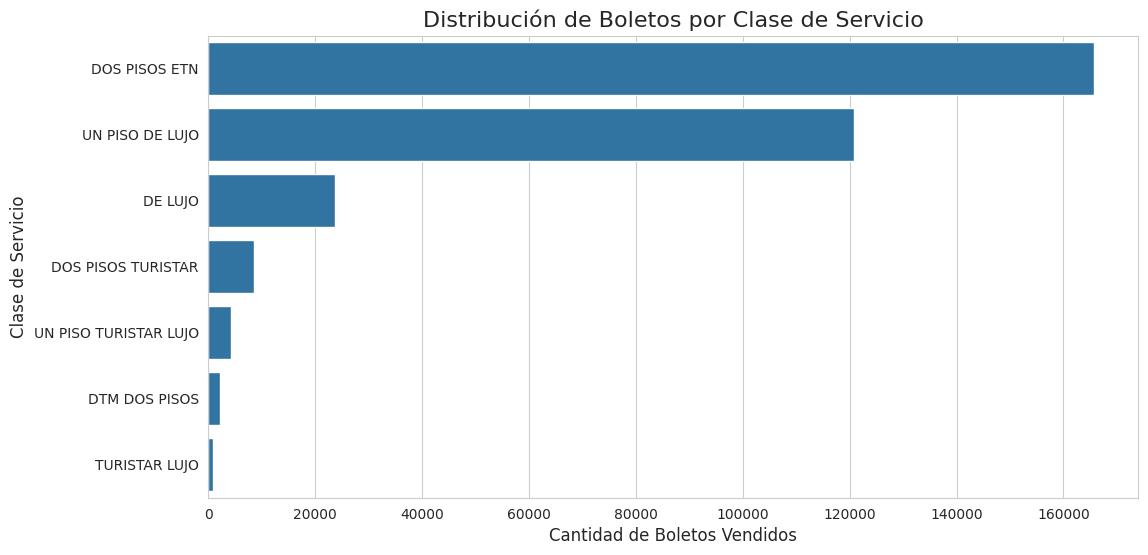

/tmp/ipython-input-1471779836.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['NOMBRE_DIA_CORRIDA'], order=dias_ordenados, palette='viridis')


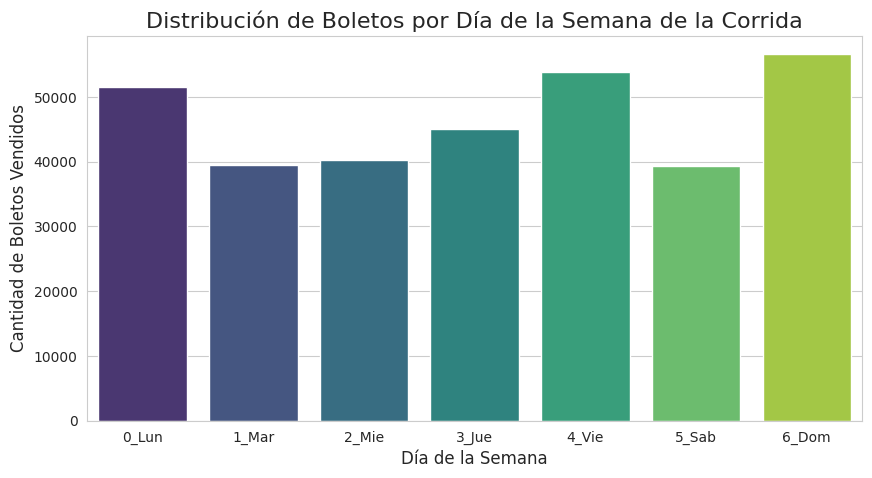

/tmp/ipython-input-1471779836.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_areas.index, x=top_15_areas.values, palette='plasma')


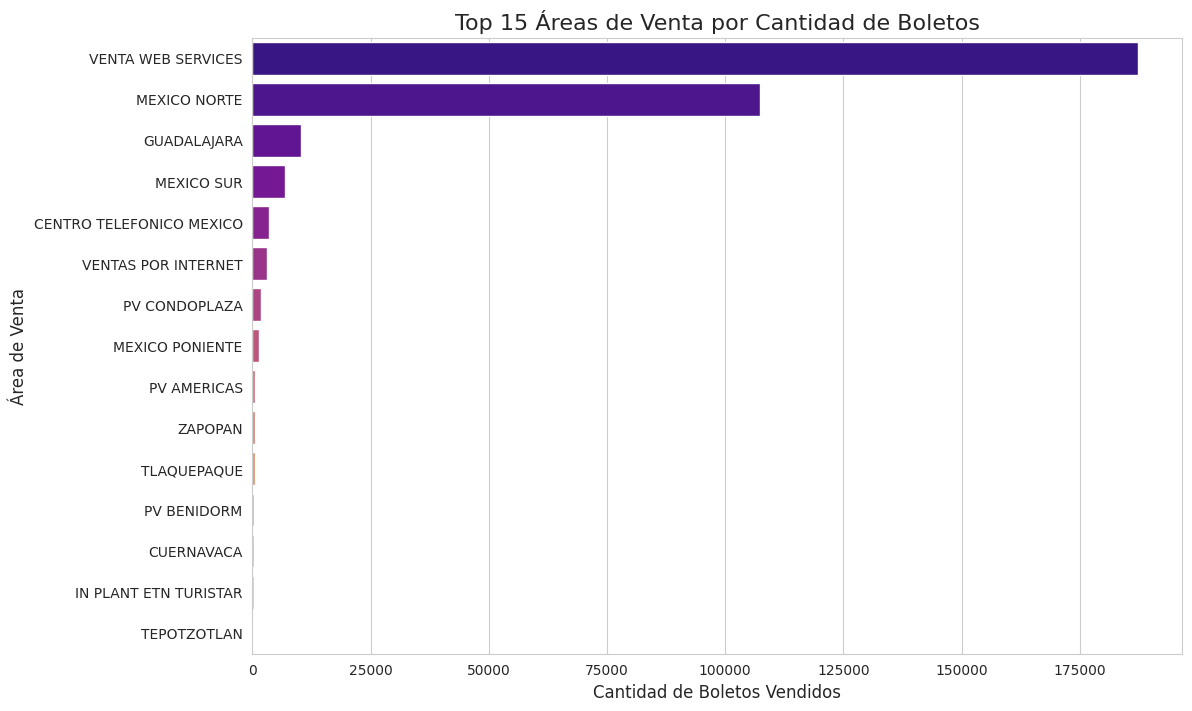

/tmp/ipython-input-1471779836.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_origenes.index, y=conteo_origenes.values, palette='viridis')


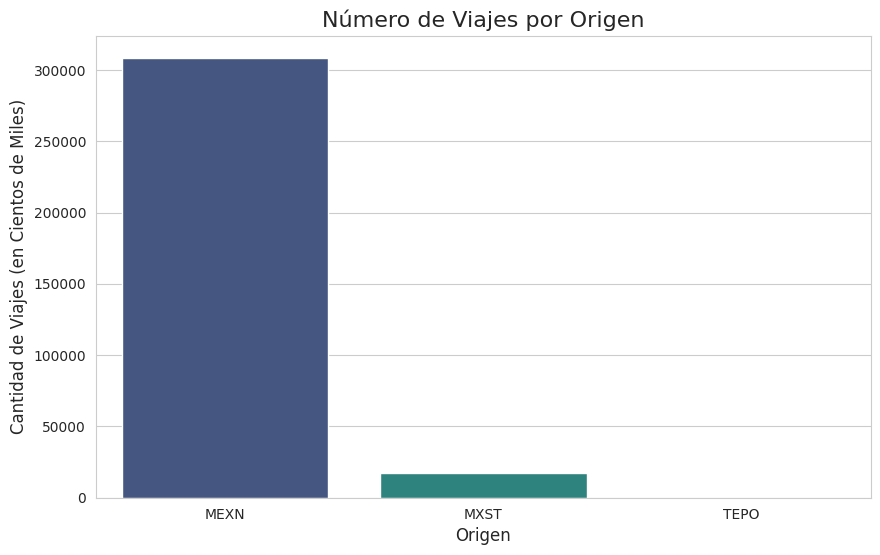

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos un estilo visual agradable para los gráficos
sns.set_style("whitegrid")

# --- 1. Gráfico para CLASE_SERVICIO ---
plt.figure(figsize=(12, 6))
sns.countplot(y=df['CLASE_SERVICIO'], order = df['CLASE_SERVICIO'].value_counts().index)
plt.title('Distribución de Boletos por Clase de Servicio', fontsize=16)
plt.xlabel('Cantidad de Boletos Vendidos', fontsize=12)
plt.ylabel('Clase de Servicio', fontsize=12)
plt.show()

# --- 2. Gráfico para NOMBRE_DIA_CORRIDA ---
plt.figure(figsize=(10, 5))
# Ordenamos los días de la semana para que se muestren lógicamente
dias_ordenados = sorted(df['NOMBRE_DIA_CORRIDA'].unique())
sns.countplot(x=df['NOMBRE_DIA_CORRIDA'], order=dias_ordenados, palette='viridis')
plt.title('Distribución de Boletos por Día de la Semana de la Corrida', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Cantidad de Boletos Vendidos', fontsize=12)
plt.show()

# --- 3. Gráfico para AREA_VENTA (¡Técnica Especial para Alta Cardinalidad!) ---
# Contamos las ventas por área y nos quedamos con las 15 principales
top_15_areas = df['AREA_VENTA'].value_counts().nlargest(15)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_15_areas.index, x=top_15_areas.values, palette='plasma')
plt.title('Top 15 Áreas de Venta por Cantidad de Boletos', fontsize=16)
plt.xlabel('Cantidad de Boletos Vendidos', fontsize=12)
plt.ylabel('Área de Venta', fontsize=12)
plt.show()

# ---- 4.

# Calculamos el conteo de orígenes
conteo_origenes = df["ORIGEN"].value_counts()

# --- Generamos la Gráfica de Barras ---
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_origenes.index, y=conteo_origenes.values, palette='viridis')

plt.title('Número de Viajes por Origen', fontsize=16)
plt.xlabel('Origen', fontsize=12)
plt.ylabel('Cantidad de Viajes (en Cientos de Miles)', fontsize=12)
plt.show()


#### **3.2.2.1 Interpretación de los Hallazgo de los graficos**

* **1. Distribución por Día de la Semana:**

  * **Observación:** Tal como sospechábamos, los viernes y domingos son los días de mayor demanda, con el lunes también siendo un día fuerte. El sábado, curiosamente, es más bajo.

  * **Impacto en el Modelo:** Esto confirma que el día de la semana será una variable predictora muy potente. Podremos justificar precios más altos en los días pico. El comportamiento del lunes podría indicar viajes de negocio, mientras que viernes y domingo son más de ocio o viajes de fin de semana.

* **2. Distribución por Clase de Servicio:**

  * **Observación:** 'DOS PISOS ETN' y 'UN PISO DE LUJO' dominan por completo el mercado en esta ruta. Las otras clases son casi anecdóticas en comparación.

  * **Impacto en el Modelo:** Nuestro modelo debe ser extremadamente preciso para estas dos clases de servicio, ya que ahí es donde se concentra la mayor parte del ingreso potencial. Podemos decidir si incluimos las otras clases o las excluimos en una primera versión para simplificar.

* **3. Top 15 Áreas de Venta (Canales):**

  * **Observación:** El canal online ('VENTA WEB SERVICES') es el rey indiscutible, seguido muy de lejos por la taquilla de 'MEXICO NORTE'.

  * **Impacto en el Modelo:** ¡Esto es una noticia fantástica para nosotros! Los clientes que compran online suelen ser más sensibles al precio, comparan más y son más receptivos a ofertas dinámicas. Nuestro modelo tendrá un impacto directo y medible en el canal de venta más importante.

* **4. Número de Viajes por Origen:**

  * **Observación:** México Norte (MEXN) es prácticamente el 99% de nuestro universo para los datos que tenemos. Los otros orígenes son insignificantes.

  * **Impacto en el Modelo:** Esto nos simplifica enormemente el trabajo. Tomemos la decisión ejecutiva de filtrar y trabajar únicamente con los viajes que salen de 'MEXN'. Así, nuestro primer modelo será específico para la ruta más importante y no se verá "contaminado" por datos de otras rutas que podrían tener comportamientos diferentes.

**Eliminamos Registros con "ORIGEN" distintos a "MEXN"**

In [7]:
 #Primero, filtramos para quedarnos solo con nuestro origen de interés
print(f"Registros originales: {len(df)}")
df_filtrado = df[df['ORIGEN'] == 'MEXN'].copy()
print(f"Registros después de filtrar por origen 'MEXN': {len(df_filtrado)}")

Registros originales: 325977
Registros después de filtrar por origen 'MEXN': 308646


**Eliminamos registros con distancias distintas a 520 KMS**

* **PASO 1: Cuatificamos el ruido**

In [8]:
# Contamos los valores y los mostramos como porcentajes
conteo_porcentual = df['KMS_TRAMO'].value_counts(normalize=True) * 100

print("Porcentaje de registros por cada valor de KMS_TRAMO:")
print(conteo_porcentual)

Porcentaje de registros por cada valor de KMS_TRAMO:
KMS_TRAMO
520.0    94.667722
538.0     4.149066
528.0     0.652500
532.0     0.508625
533.0     0.007669
690.0     0.007056
587.0     0.003681
557.0     0.002761
565.0     0.000614
490.0     0.000307
Name: proportion, dtype: float64


In [9]:
# Definimos nuestro kilometraje correcto basado en la abrumadora mayoría
kilometraje_correcto = 520.0
print(f"\nEl kilometraje considerado como correcto para la ruta es: {kilometraje_correcto} km")

# Guardamos el número de registros antes de filtrar
registros_originales = len(df)

# Filtramos el DataFrame para quedarnos SOLAMENTE con los registros correctos
# Usamos .copy() para evitar warnings de SettingWithCopyWarning más adelante
df_filtrado_kms = df[df['KMS_TRAMO'] == kilometraje_correcto].copy()

# Reportamos el impacto de nuestra limpieza
registros_finales = len(df_filtrado_kms)
registros_eliminados = registros_originales - registros_finales
porcentaje_eliminado = (registros_eliminados / registros_originales) * 100

print(f"\nSe eliminaron {registros_eliminados} registros con kilometraje anómalo ({porcentaje_eliminado:.2f}% del total).")
print(f"Nuestro nuevo DataFrame 'df_filtrado_kms' tiene {registros_finales} registros.")

# A partir de ahora, todas nuestras operaciones serán sobre este DataFrame limpio.


El kilometraje considerado como correcto para la ruta es: 520.0 km

Se eliminaron 17382 registros con kilometraje anómalo (5.33% del total).
Nuestro nuevo DataFrame 'df_filtrado_kms' tiene 308595 registros.


#### **3.2.3 Analisis Tarifas vs Tipo Autobus y Tarifa vs Clase Servicio**


✅ Se ha generado el mapa de calor y guardado como 'heatmap_evolucion_tarifas.png'


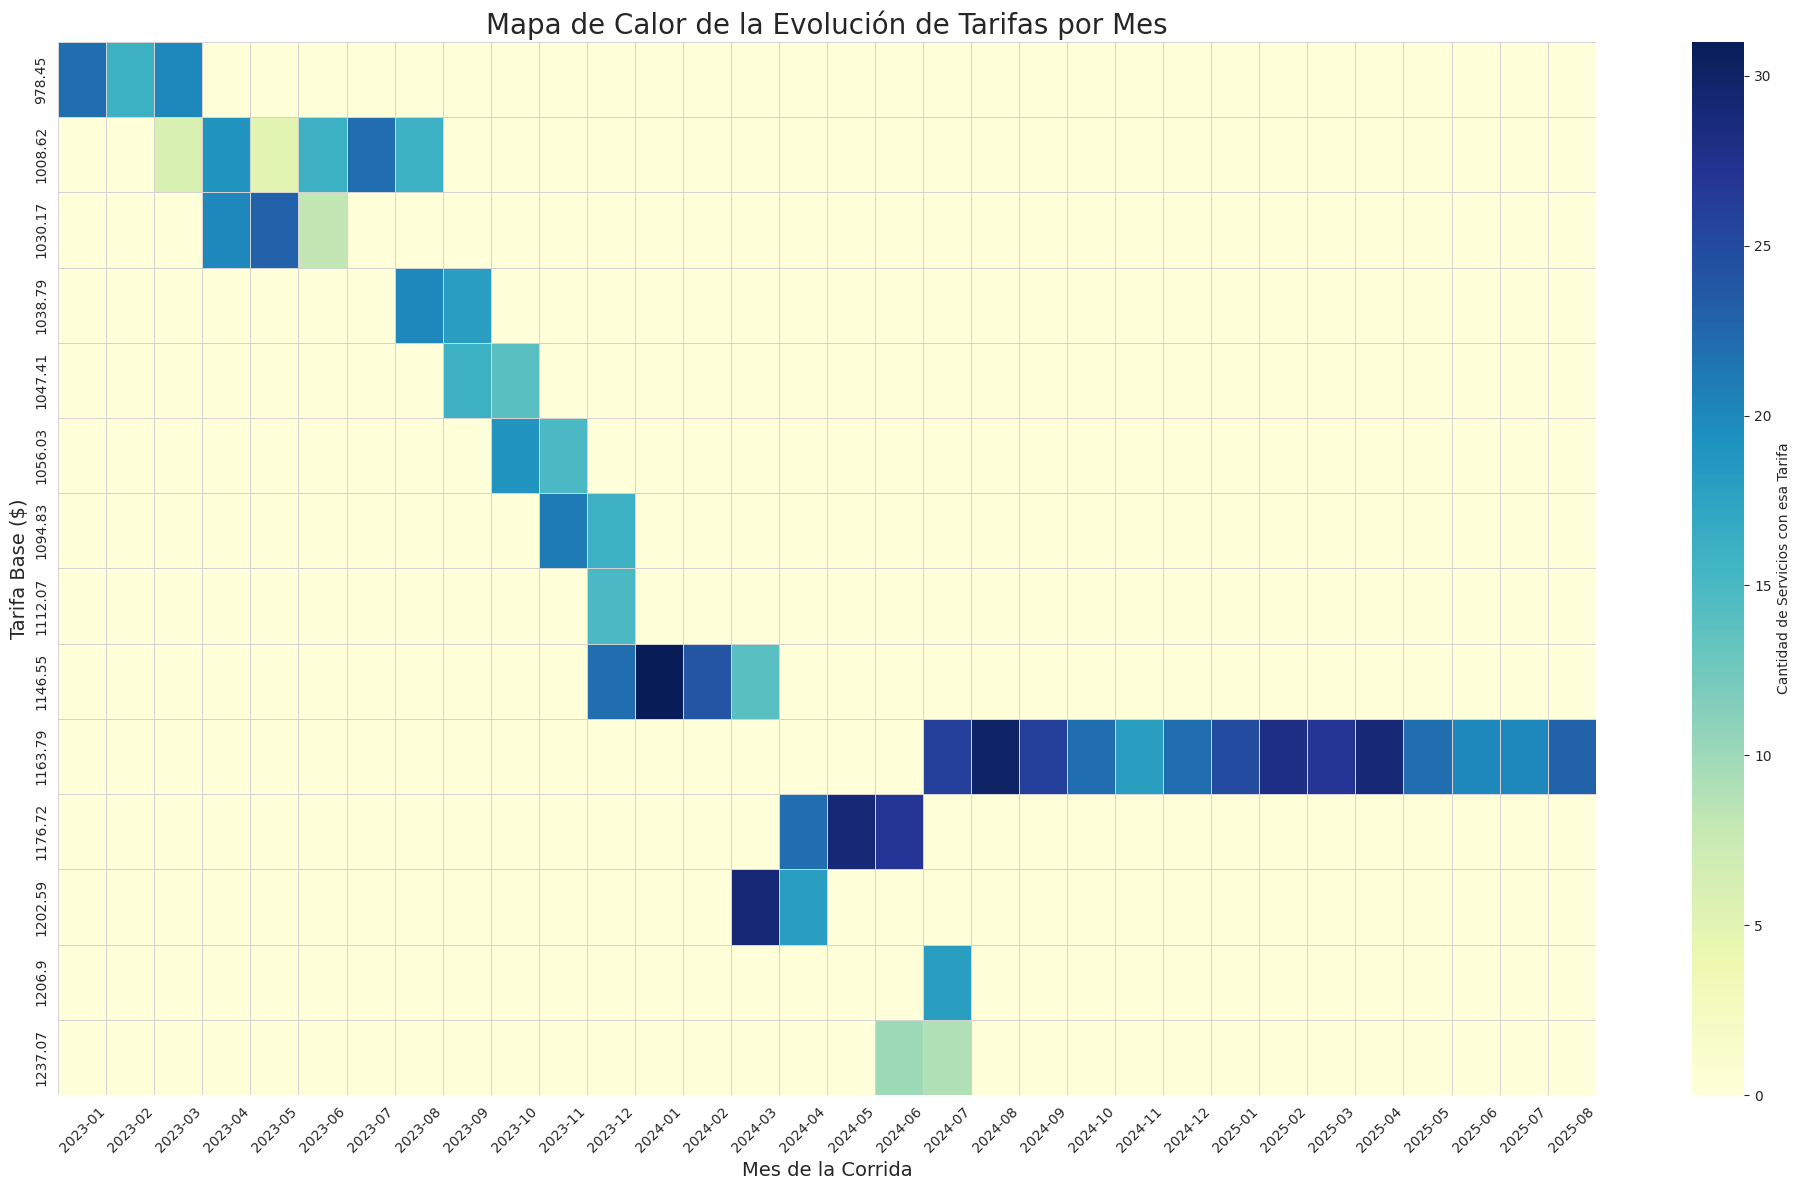

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que 'df_filtrado_kms' es tu DataFrame ya modificado y ya está cargado

# --- Paso 1: Recrear la tabla de evolución de precios ---
# (Incluyo todos los pasos para que el código sea autocontenido)
df_filtrado_kms['FECHA_CORRIDA'] = pd.to_datetime(df_filtrado_kms['FECHA_CORRIDA'], errors='coerce')
df_filtrado_kms['SERVICIO_BUS'] = df_filtrado_kms['CLASE_SERVICIO'] + " - " + df_filtrado_kms['TIPO_BUS']

evolucion_precios = df_filtrado_kms.groupby([
    df_filtrado_kms['FECHA_CORRIDA'].dt.to_period('M'),
    'TARIFA_BASE_TRAMO'
]).agg(
    SERVICIOS_OFRECIDOS=('SERVICIO_BUS', 'unique')
).reset_index()

# --- Paso 2: Preparar los datos para el mapa de calor ---
# Contamos cuántos servicios únicos había para cada tarifa/mes
evolucion_precios['NUM_SERVICIOS'] = evolucion_precios['SERVICIOS_OFRECIDOS'].str.len()
# Convertimos el mes a texto para que funcione bien en la tabla pivote
evolucion_precios['FECHA_CORRIDA'] = evolucion_precios['FECHA_CORRIDA'].astype(str)

# Creamos la tabla pivote: los meses serán las columnas, las tarifas las filas
heatmap_data = evolucion_precios.pivot_table(
    index='TARIFA_BASE_TRAMO',
    columns='FECHA_CORRIDA',
    values='NUM_SERVICIOS',
    fill_value=0  # Rellenamos con 0 los meses donde una tarifa no existía
)

# Ordenamos las columnas cronológicamente
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

# --- Paso 3: Generar el gráfico ---
plt.figure(figsize=(20, 12))  # Hacemos la figura más grande para que sea legible
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',  # Paleta de colores: Amarillo -> Verde -> Azul
    linewidths=.5,
    linecolor='lightgray',
    cbar_kws={'label': 'Cantidad de Servicios con esa Tarifa'}
)

plt.title('Mapa de Calor de la Evolución de Tarifas por Mes', fontsize=20)
plt.xlabel('Mes de la Corrida', fontsize=14)
plt.ylabel('Tarifa Base ($)', fontsize=14)
plt.xticks(rotation=45) # Rotamos las etiquetas de los meses para mejor lectura
plt.tight_layout() # Ajusta el gráfico para que todo quepa

# Guardamos la imagen en un archivo
plt.savefig('heatmap_evolucion_tarifas.png')

print("\n✅ Se ha generado el mapa de calor y guardado como 'heatmap_evolucion_tarifas.png'")

#### **3.2.4.1 Interpretación de los Hallazgo de los graficos**

* **Se Valida Enfoque:** Ahora se sabe que se esta construyendo algo completamente nuevo para la empresa, no solo mejorando un sistema existente.

* **Ajustar las Expectativas del Modelo:** El modelo de Machine Learning no podrá aprender de sutiles variaciones diarias de precio en el pasado, ¡porque no existieron! Tendrá que aprender la elasticidad a partir de los "experimentos naturales" que ocurrieron cada vez que la empresa decidió hacer un salto de precio general.

* **Simplifica la Fase 1:** Nuestro modelo de demanda base se vuelve aún más importante. Como el precio era prácticamente constante dentro de cada periodo, podremos modelar la demanda en función de las otras variables (día de la semana, anticipación, etc.) con mayor claridad.

* **Próximo Objetivo:** La Agregación (Ahora con más contexto)
EL análisis ha sido  bueno que se prepara perfectamente para el siguiente paso que habíamos planeado. Ahora que entendemos el comportamiento del precio, necesitamos consolidar nuestros datos a nivel de viaje para empezar a modelar la demanda.

La misión inmediata sigue siendo la misma, pero ahora con un entendimiento mucho más profundo de lo que significan los datos.

In [11]:
# Asumiendo que ya tienes 'df_filtrado_kms' del paso anterior

print("Agregando datos a nivel de viaje...")
df_viajes = df_filtrado_kms.groupby(['CV_CORRIDA', 'FECHA_CORRIDA']).agg(
    hora_salida=('HORA_SALIDA_CORRIDA', 'first'),
    dia_corrida=('NOMBRE_DIA_CORRIDA', 'first'),
    origen=('ORIGEN', 'first'),
    destino=('DESTINO', 'first'),
    clase_servicio=('CLASE_SERVICIO', 'first'),
    capacidad=('CAPACIDAD_ASIENTOS_TRAMO', 'first'),

    # Nuestra variable objetivo
    boletos_vendidos=('BOLETOS_VEND', 'sum'),

    # Variables de negocio
    ingreso_total_viaje=('INGRESO_TRANSP', 'sum'),
    tarifa_promedio=('TARIFA_BASE_TRAMO', 'mean')
).reset_index()

# Calculamos nuestra segunda posible variable objetivo
df_viajes['tasa_ocupacion'] = df_viajes['boletos_vendidos'] / df_viajes['capacidad']

print("\nDataFrame agregado 'df_viajes' creado exitosamente:")
display(df_viajes.sample(5,random_state=42))

print(f"\nTotal de viajes únicos en nuestro dataset: {len(df_viajes)}")

Agregando datos a nivel de viaje...

DataFrame agregado 'df_viajes' creado exitosamente:


,CV_CORRIDA,FECHA_CORRIDA,hora_salida,dia_corrida,origen,destino,clase_servicio,capacidad,boletos_vendidos,ingreso_total_viaje,tarifa_promedio,tasa_ocupacion
13694,1255617,2025-06-05,1900-01-01 11:00:00,3_Jue,MEXN,GDLJ,UN PISO DE LUJO,36.0,27.0,714892.64,1163.79,0.750000
2375,1201009,2025-08-02,1900-01-01 23:59:00,5_Sab,MEXN,GDLJ,DOS PISOS ETN,36.0,21.0,419226.99,1163.79,0.583333
13652,1255585,2025-07-29,1900-01-01 13:30:00,1_Mar,MEXN,GDLJ,DOS PISOS ETN,36.0,31.0,898281.36,1163.79,0.861111
12445,1251534,2025-07-16,1900-01-01 23:30:00,2_Mie,MEXN,GDLJ,UN PISO DE LUJO,36.0,34.0,1225302.40,1163.79,0.944444
169,1160619,2023-06-15,1900-01-01 19:40:00,3_Jue,MEXN,GDLJ,DOS PISOS ETN,35.0,6.0,31598.28,1008.62,0.171429



Total de viajes únicos en nuestro dataset: 14498


Se han transformado exitosamente los datos transaccionales (una fila por boleto) en un conjunto de datos agregado a nivel de viaje (una fila por corrida). Este nuevo DataFrame, df_viajes, es exactamente lo que necesitamos para construir el modelo de predicción de demanda.

### **3.3 Preparación de datos y Feutere Enigineeing**

#### **3.3.1 Cambio de tipo de variable de dias de la semana**

Ahora Iniciaremos la ingenieria de caracteristicas para identificar cada dia de la semana pues estas son varibles importantes a demas que la hora la convertimos a formato dttime.

In [12]:
import pandas as pd

print("Iniciando la Ingeniería de Características...")

# --- 1. Creación de Variables de Tiempo ---

# Paso 1: Combinar fecha y hora en una sola columna 'timestamp_salida'
print("Paso 1: Creando columna 'timestamp' unificada...")
# **LA CORRECCIÓN ESTÁ AQUÍ**: Añadimos .astype(str) a la columna de fecha
df_viajes['timestamp_salida'] = pd.to_datetime(
    df_viajes['FECHA_CORRIDA'].astype(str) + ' ' + pd.to_datetime(df_viajes['hora_salida']).dt.strftime('%H:%M:%S')
)

# Paso 2: Extraer componentes de tiempo del nuevo 'timestamp_salida'
print("Paso 2: Extrayendo características de tiempo...")
df_viajes['mes'] = df_viajes['timestamp_salida'].dt.month
df_viajes['dia_semana'] = df_viajes['timestamp_salida'].dt.dayofweek  # Lunes=0, Domingo=6
df_viajes['hora_del_dia'] = df_viajes['timestamp_salida'].dt.hour
df_viajes['dia_del_mes'] = df_viajes['timestamp_salida'].dt.day
df_viajes['semana_del_anio'] = df_viajes['timestamp_salida'].dt.isocalendar().week

# Paso 3: Crear características de negocio basadas en el tiempo
print("Paso 3: Creando características de negocio...")
# Variable para identificar si es fin de semana
df_viajes['es_fin_de_semana'] = df_viajes['dia_semana'].apply(lambda d: 1 if d >= 4 else 0) # Vie, Sab, Dom

# Variable para identificar si es quincena (días de pago)
df_viajes['es_quincena'] = df_viajes['dia_del_mes'].apply(
    lambda dia: 1 if (14 <= dia <= 16) or (dia >= 28) else 0
)


print("\n¡Ingeniería de Características completada exitosamente!")
print("A continuación, una muestra de las nuevas columnas creadas:")
display(df_viajes[[
    'timestamp_salida',
    'mes',
    'dia_semana',
    'hora_del_dia',
    'es_fin_de_semana',
    'es_quincena'
]].sample(5, random_state=42))

Iniciando la Ingeniería de Características...
Paso 1: Creando columna 'timestamp' unificada...
Paso 2: Extrayendo características de tiempo...
Paso 3: Creando características de negocio...

¡Ingeniería de Características completada exitosamente!
A continuación, una muestra de las nuevas columnas creadas:


,timestamp_salida,mes,dia_semana,hora_del_dia,es_fin_de_semana,es_quincena
13694,2025-06-05 11:00:00,6,3,11,0,0
2375,2025-08-02 23:59:00,8,5,23,1,0
13652,2025-07-29 13:30:00,7,1,13,0,1
12445,2025-07-16 23:30:00,7,2,23,0,1
169,2023-06-15 19:40:00,6,3,19,0,1


**Columnas Creadas:** Todas las nuevas columnas (timestamp_salida, mes, dia_semana, etc.) se han añadido correctamente al DataFrame.

#### **3.3.2 Incorporación de dias festivos.**

Incorporamos informacion sobre dias festivos, puentes y demas obtenidos de los calendarios oficiales de la SEP.

In [13]:
import pandas as pd
import numpy as np

# ==============================================================================
# PASO 1: CREACIÓN Y FUSIÓN DEL CALENDARIO
# ==============================================================================

# --- Parte A: Crear el DataFrame 'df_calendario' ---
print("Creando el calendario de eventos especiales...")

# 1. Días Festivos Oficiales, Puentes y Periodos Vacacionales (Basado en SEP y LFT México)
eventos = []
# Ciclo 2022-2023
eventos.extend([(d, 'Puente_Festivo') for d in pd.to_datetime(['2022-09-16', '2022-11-21'])])
eventos.extend([(d, 'Dia_Festivo') for d in pd.to_datetime(['2022-11-02'])])
for date in pd.date_range('2022-12-19', '2023-01-06'): eventos.append((date, 'Vacaciones_Navidad'))
for date in pd.date_range('2023-04-03', '2023-04-14'): eventos.append((date, 'Semana_Santa'))
# Ciclo 2023-2024
eventos.extend([(d, 'Puente_Festivo') for d in pd.to_datetime(['2023-09-15', '2023-11-20', '2024-02-05', '2024-03-18'])])
eventos.extend([(d, 'Dia_Festivo') for d in pd.to_datetime(['2023-11-02', '2024-05-01', '2024-05-15'])])
for date in pd.date_range('2023-12-18', '2024-01-05'): eventos.append((date, 'Vacaciones_Navidad'))
for date in pd.date_range('2024-03-25', '2024-04-05'): eventos.append((date, 'Semana_Santa'))
# Ciclo 2024-2025
eventos.extend([(d, 'Puente_Festivo') for d in pd.to_datetime(['2024-09-16', '2024-11-18', '2025-02-03', '2025-03-17'])])
eventos.extend([(d, 'Dia_Festivo') for d in pd.to_datetime(['2024-11-02', '2025-05-01', '2025-05-05', '2025-05-15'])])
for date in pd.date_range('2024-12-19', '2025-01-06'): eventos.append((date, 'Vacaciones_Navidad'))
for date in pd.date_range('2025-04-14', '2025-04-25'): eventos.append((date, 'Semana_Santa'))

df_eventos = pd.DataFrame(eventos, columns=['FECHA', 'TIPO_DIA']).drop_duplicates(subset='FECHA', keep='first')

print("... 'df_calendario' creado con éxito.")


# --- Parte B: Unir (Merge) el calendario con df_viajes ---
print("\nFusionando calendario con datos de viajes...")

# Aseguramos que las columnas de fecha tengan el formato correcto antes de unir
df_viajes['FECHA_CORRIDA'] = pd.to_datetime(df_viajes['FECHA_CORRIDA'])
df_eventos['FECHA'] = pd.to_datetime(df_eventos['FECHA'])

# Unimos los DataFrames. Usamos 'how=left' para mantener todos nuestros viajes.
df_viajes = pd.merge(
    df_viajes,
    df_eventos,
    left_on='FECHA_CORRIDA',
    right_on='FECHA',
    how='left'
)

# Rellenamos los días que no son festivos con la etiqueta 'Normal'
df_viajes['TIPO_DIA'].fillna('Normal', inplace=True)
# Eliminamos la columna de fecha duplicada que vino del merge
df_viajes.drop('FECHA', axis=1, inplace=True)

print("✅ Se ha integrado la información del calendario en 'df_viajes'.")
print("\nMuestra aleatoria para verificación de la nueva columna 'TIPO_DIA':")
display(df_viajes[['FECHA_CORRIDA', 'dia_corrida', 'TIPO_DIA']].sample(10, random_state=42))

Creando el calendario de eventos especiales...
... 'df_calendario' creado con éxito.

Fusionando calendario con datos de viajes...
✅ Se ha integrado la información del calendario en 'df_viajes'.

Muestra aleatoria para verificación de la nueva columna 'TIPO_DIA':


/tmp/ipython-input-1330286235.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_viajes['TIPO_DIA'].fillna('Normal', inplace=True)


,FECHA_CORRIDA,dia_corrida,TIPO_DIA
13694,2025-06-05,3_Jue,Normal
2375,2025-08-02,5_Sab,Normal
13652,2025-07-29,1_Mar,Normal
12445,2025-07-16,2_Mie,Normal
169,2023-06-15,3_Jue,Normal
8443,2024-07-19,4_Vie,Normal
8603,2025-01-01,2_Mie,Vacaciones_Navidad
3751,2024-12-26,3_Jue,Vacaciones_Navidad
4101,2023-01-09,0_Lun,Normal
9983,2024-11-14,3_Jue,Normal


#### **3.2.3 Franjas horarios**

El siguiente paso sera crear franjas de horarios, es decir debido a que los horarios de las salidas no son constantes las dividiremos por , madrugada, mañana, tarde y noche.

In [14]:
import pandas as pd

print("Creando franjas horarias...")

# Definimos los límites y etiquetas para las franjas horarias
# Bins: [0-5] Madrugada, [6-11] Mañana, [12-17] Tarde, [18-23] Noche
bins = [0, 6, 12, 18, 24]
labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']

# Usamos pd.cut para segmentar la columna 'hora_del_dia' y crear la nueva característica
df_viajes['franja_horaria'] = pd.cut(
    df_viajes['hora_del_dia'],
    bins=bins,
    labels=labels,
    right=False, # Importante: [0,6) -> incluye 0, excluye 6
    include_lowest=True
)

print("✅ ¡Columna 'franja_horaria' creada con éxito!")
print("\nMuestra para verificación:")
display(df_viajes[['hora_del_dia', 'franja_horaria']].sample(10, random_state=1))

Creando franjas horarias...
✅ ¡Columna 'franja_horaria' creada con éxito!

Muestra para verificación:


,hora_del_dia,franja_horaria
13524,19,Noche
7843,1,Madrugada
12375,23,Noche
12544,12,Tarde
7437,6,Mañana
8909,21,Noche
9251,16,Tarde
3289,23,Noche
5182,10,Mañana
2811,15,Tarde


In [15]:
df_viajes.sample(5, random_state=42)

,CV_CORRIDA,FECHA_CORRIDA,hora_salida,dia_corrida,origen,destino,clase_servicio,capacidad,boletos_vendidos,ingreso_total_viaje,...,timestamp_salida,mes,dia_semana,hora_del_dia,dia_del_mes,semana_del_anio,es_fin_de_semana,es_quincena,TIPO_DIA,franja_horaria
13694,1255617,2025-06-05,1900-01-01 11:00:00,3_Jue,MEXN,GDLJ,UN PISO DE LUJO,36.0,27.0,714892.64,...,2025-06-05 11:00:00,6,3,11,5,23,0,0,Normal,Mañana
2375,1201009,2025-08-02,1900-01-01 23:59:00,5_Sab,MEXN,GDLJ,DOS PISOS ETN,36.0,21.0,419226.99,...,2025-08-02 23:59:00,8,5,23,2,31,1,0,Normal,Noche
13652,1255585,2025-07-29,1900-01-01 13:30:00,1_Mar,MEXN,GDLJ,DOS PISOS ETN,36.0,31.0,898281.36,...,2025-07-29 13:30:00,7,1,13,29,31,0,1,Normal,Tarde
12445,1251534,2025-07-16,1900-01-01 23:30:00,2_Mie,MEXN,GDLJ,UN PISO DE LUJO,36.0,34.0,1225302.40,...,2025-07-16 23:30:00,7,2,23,16,29,0,1,Normal,Noche
169,1160619,2023-06-15,1900-01-01 19:40:00,3_Jue,MEXN,GDLJ,DOS PISOS ETN,35.0,6.0,31598.28,...,2023-06-15 19:40:00,6,3,19,15,24,0,1,Normal,Noche


In [16]:
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CV_CORRIDA           14498 non-null  int64         
 1   FECHA_CORRIDA        14498 non-null  datetime64[ns]
 2   hora_salida          14498 non-null  object        
 3   dia_corrida          14498 non-null  object        
 4   origen               14498 non-null  object        
 5   destino              14498 non-null  object        
 6   clase_servicio       14498 non-null  object        
 7   capacidad            14498 non-null  float64       
 8   boletos_vendidos     14498 non-null  float64       
 9   ingreso_total_viaje  14498 non-null  float64       
 10  tarifa_promedio      14498 non-null  float64       
 11  tasa_ocupacion       14498 non-null  float64       
 12  timestamp_salida     14498 non-null  datetime64[ns]
 13  mes                  14498 non-

#### **3.2.4 Selección de Variables**


A continuacion se elijen las variables que conformaran nuestras variables predictoras para la etapa 1, siendo de vital importancia elejir las adecuadas.

 **Tabla Resumen de Selección Estratégica**

| Categoría | Decisión | Variables | Justificación |
| :--- | :---: | :--- | :--- |
| **Objetivo (Etapa 1)** | **Conservar (y)** | `boletos_vendidos` | Es nuestra variable objetivo principal en `df_viajes`, representa la demanda por viaje. |
| **Predictoras del Viaje (Etapa 1)** | **Conservar (X)** | `clase_servicio`, `capacidad`, `tarifa_promedio`, `mes`, `dia_semana`, `hora_del_dia`, `es_quincena`, `es_fin_de_semana`, `TIPO_DIA`, `franja_horaria` | Características que definen el "producto" (viaje, calidad, precio, momento) y tienen poder predictivo sobre la demanda. |
| **Relevancia para Precios** | **Guardar (Etapas 2 y 3)** | `VENTA`, `MEMBRESIA_CRM`, `TIPO_PASAJERO`, `AREA_VENTA`, `VENTA_ANTICIPADA`, `PORCENT_PROMO`, `DESC_DESCUENTO` | Describen la transacción final y al cliente. Cruciales para los modelos de precios dinámicos y personalización. |
| **Fuga de Datos o Redundancia con Objetivo** | **Descartar** | `tasa_ocupacion`, `OCUPACION_TRAMO`, `DISPONIBILIDAD_TRAMO`, `PAX_BAJAN`, `BOLETOS_VEND`, `BOLETOS_CANCEL` | Miden el mismo concepto que el objetivo (`boletos_vendidos`) o se usan para construirlo. |
| **Información Redundante o Constante**| **Descartar** | `FECHA_CORRIDA`, `hora_salida`, `dia_corrida`, `origen`, `destino`, `KMS_TRAMO`, `ORIGEN_CORRIDA` | Su información ya fue extraída a mejores variables (ej. `mes`, `dia_semana`) o se volvieron constantes después de la limpieza. |
| **Contables y Administrativos** | **Descartar** | `ingreso_total_viaje`, Todas las variables `IVA_*`, `VENTA_CANCEL` | Son cálculos contables derivados de otras variables. No aportan información de comportamiento. |
| **Identificadores y Datos Personales** | **Descartar** | `CV_CORRIDA`, `OPERACION`, `CV_ASIGN`, `NUM_ASIENTO`, `NOMBRE_PASAJERO`, `TEL_PASAJERO`, `CORREO_ELECTRONICO`| Son códigos de registro o datos personales que no tienen valor predictivo y se eliminan por privacidad. |

#### **3.2.5 Preparación Final para el Modelado**

**El proceso se divide en dos tareas clave:**

* **1. Codificación de Variables Categóricas (Encoding)**
Los modelos de Machine Learning necesitan que toda la información de entrada sea numérica.

  * **¿Qué variables necesitan transformación?**
  
     En  df_viajes, estas son columnas como clase_servicio, TIPO_DIA, y franja_horaria.

  * **¿Cómo se hace?**
  
    La técnica más común y recomendada para esto es One-Hot Encoding. Es como crear un conjunto de interruptores de "encendido/apagado". En lugar de una columna franja_horaria con el texto "Tarde", se tendrá una nueva columna llamada franja_horaria_Tarde con un 1 (encendido) y el resto de las franjas con un 0 (apagado). La función pd.get_dummies() de pandas hace esto de forma muy sencilla.

* **2. Escalado de Variables Numéricas (Scaling)**
Una vez que todas las variables son números, es crucial asegurarse de que estén en una escala similar.

  * **¿Por qué?**

   Para evitar que el modelo le dé más importancia a una variable solo porque sus números son más grandes. Por ejemplo, sin escalar, el modelo podría pensar que tarifa_promedio (con valores ~1000) es mil veces más importante que es_fin_de_semana (con valores 0 o 1).

   * **¿Qué variables?**
   
    Se aplica a todas las variables que ya son numéricas, como capacidad, tarifa_promedio, mes, hora_del_dia, etc.

   * **¿Cómo se hace? Las técnicas más comunes son:**

      * **StandardScaler:** Transforma los datos para que tengan una media de 0 y una desviación estándar de 1 (normalización). Es la opción más robusta y comúnmente usada.

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- PASO 0: Seleccionar las variables finales para el modelo ---
print("Paso 0: Seleccionando las variables finales según la tabla estratégica...")

# Nuestra variable objetivo (lo que queremos predecir)
y = df_viajes['boletos_vendidos']

# Nuestras variables predictoras (las características que usará el modelo)
columnas_predictoras = [
    'clase_servicio',
    'capacidad',
    'tarifa_promedio',
    'mes',
    'dia_semana',
    'hora_del_dia',
    'es_quincena',
    'es_fin_de_semana',
    'TIPO_DIA',
    'franja_horaria'
]
X = df_viajes[columnas_predictoras]

print(f"Hemos seleccionado {X.shape[1]} variables predictoras.")


# --- PASO 1: Codificación de Variables Categóricas (One-Hot Encoding) ---
print("\nPaso 1: Convirtiendo variables categóricas a formato numérico...")

# Identificamos las columnas que no son números
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns

# Usamos pd.get_dummies para aplicar One-Hot Encoding
X_codificado = pd.get_dummies(
    X,
    columns=columnas_categoricas,
    drop_first=True # Buena práctica para evitar redundancia
)

print("¡Codificación completada!")
print(f"El número de columnas aumentó de {X.shape[1]} a {X_codificado.shape[1]} después de la codificación.")


# --- PASO 2: Escalado de Variables Numéricas ---
print("\nPaso 2: Escalando todas las variables a una escala común...")

# Inicializamos el escalador
scaler = StandardScaler()

# Entrenamos el escalador y transformamos nuestros datos
X_escalado_np = scaler.fit_transform(X_codificado)

# Convertimos el resultado (que es un array de NumPy) de nuevo a un DataFrame de pandas
X_final = pd.DataFrame(X_escalado_np, columns=X_codificado.columns)


print("¡Escalado completado!")
print("\n✅ ¡PREPARACIÓN FINALIZADA! Tus datos están listos para el modelado.")
print("A continuación, una muestra del DataFrame final 'X_final':")
display(X_final.sample(5, random_state=42))

Paso 0: Seleccionando las variables finales según la tabla estratégica...
Hemos seleccionado 10 variables predictoras.

Paso 1: Convirtiendo variables categóricas a formato numérico...
¡Codificación completada!
El número de columnas aumentó de 10 a 20 después de la codificación.

Paso 2: Escalando todas las variables a una escala común...
¡Escalado completado!

✅ ¡PREPARACIÓN FINALIZADA! Tus datos están listos para el modelado.
A continuación, una muestra del DataFrame final 'X_final':


,capacidad,tarifa_promedio,mes,dia_semana,hora_del_dia,es_quincena,es_fin_de_semana,clase_servicio_DOS PISOS ETN,clase_servicio_DOS PISOS TURISTAR,clase_servicio_DTM DOS PISOS,clase_servicio_TURISTAR LUJO,clase_servicio_UN PISO DE LUJO,clase_servicio_UN PISO TURISTAR LUJO,TIPO_DIA_Normal,TIPO_DIA_Puente_Festivo,TIPO_DIA_Semana_Santa,TIPO_DIA_Vacaciones_Navidad,franja_horaria_Mañana,franja_horaria_Tarde,franja_horaria_Noche
13694,0.570953,0.647879,-0.004719,-0.032598,-0.658045,-0.519481,-0.902758,-1.006921,-0.197447,-0.088235,-0.038086,1.305313,-0.162279,0.376025,-0.106634,-0.219774,-0.250805,1.999397,-0.515196,-1.006505
2375,0.570953,0.647879,0.587687,0.952001,1.072314,-0.519481,1.107716,0.993126,-0.197447,-0.088235,-0.038086,-0.766100,-0.162279,0.376025,-0.106634,-0.219774,-0.250805,-0.500151,-0.515196,0.993537
13652,0.570953,0.647879,0.291484,-1.017197,-0.369652,1.924997,-0.902758,0.993126,-0.197447,-0.088235,-0.038086,-0.766100,-0.162279,0.376025,-0.106634,-0.219774,-0.250805,-0.500151,1.941008,-1.006505
12445,0.570953,0.647879,0.291484,-0.524897,1.072314,1.924997,-0.902758,-1.006921,-0.197447,-0.088235,-0.038086,1.305313,-0.162279,0.376025,-0.106634,-0.219774,-0.250805,-0.500151,-0.515196,0.993537
169,0.056012,-1.509169,-0.004719,-0.032598,0.495528,1.924997,-0.902758,0.993126,-0.197447,-0.088235,-0.038086,-0.766100,-0.162279,0.376025,-0.106634,-0.219774,-0.250805,-0.500151,-0.515196,0.993537


### **3.4 Inicio de Modelo Machine Learning XGBoost y Random Forest**

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- PASO 1: División de Datos ---
# Dividimos nuestros datos en conjuntos de entrenamiento (80%) y prueba (20%)
# X_final es tu DataFrame con características codificadas y escaladas
# y es tu variable objetivo ('boletos_vendidos')

print("Paso 1: Dividiendo los datos en entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)
print(f"Datos de entrenamiento: {X_train.shape[0]} registros")
print(f"Datos de prueba: {X_test.shape[0]} registros")


# --- PASO 2: Entrenar Modelo A - Random Forest ---
print("\nPaso 2: Entrenando el modelo Random Forest...")

# Inicializamos el modelo con un estado aleatorio para reproducibilidad
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamos el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)
print("¡Random Forest entrenado!")


# --- PASO 3: Entrenar Modelo B - XGBoost ---
print("\nPaso 3: Entrenando el modelo XGBoost...")

# Inicializamos el modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamos el modelo
xgb_model.fit(X_train, y_train)
print("¡XGBoost entrenado!")


# --- PASO 4: Evaluación y Comparación ---
print("\nPaso 4: Evaluando el rendimiento de los modelos en los datos de prueba...")

# Hacemos predicciones con ambos modelos
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculamos las métricas para Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Calculamos las métricas para XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)


# Imprimimos los resultados en una tabla comparativa
results = {
    "Métrica": ["Error Absoluto Medio (MAE)", "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Random Forest": [f"{mae_rf:.2f}", f"{rmse_rf:.2f}", f"{r2_rf:.2%} "],
    "XGBoost": [f"{mae_xgb:.2f}", f"{rmse_xgb:.2f}", f"{r2_xgb:.2%}"]
}
results_df = pd.DataFrame(results)

print("\n--- Resultados de la Comparación ---")
display(results_df)

Paso 1: Dividiendo los datos en entrenamiento y prueba...
Datos de entrenamiento: 11598 registros
Datos de prueba: 2900 registros

Paso 2: Entrenando el modelo Random Forest...
¡Random Forest entrenado!

Paso 3: Entrenando el modelo XGBoost...
¡XGBoost entrenado!

Paso 4: Evaluando el rendimiento de los modelos en los datos de prueba...

--- Resultados de la Comparación ---
Métrica	Random Forest	XGBoost
0	Error Absoluto Medio (MAE)	5.66	5.23
1	Raíz del Error Cuadrático Medio (RMSE)	7.34	6.67
2	Coeficiente de Determinación (R²)	45.01%	54.59%

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- PASO 1: División de Datos ---
# Dividimos nuestros datos en conjuntos de entrenamiento (80%) y prueba (20%)
# X_final es tu DataFrame con características codificadas y escaladas
# y es tu variable objetivo ('boletos_vendidos')

print("Paso 1: Dividiendo los datos en entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)
print(f"Datos de entrenamiento: {X_train.shape[0]} registros")
print(f"Datos de prueba: {X_test.shape[0]} registros")


# --- PASO 2: Entrenar Modelo A - Random Forest ---
print("\nPaso 2: Entrenando el modelo Random Forest...")

# Inicializamos el modelo con un estado aleatorio para reproducibilidad
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamos el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)
print("¡Random Forest entrenado!")


# --- PASO 3: Entrenar Modelo B - XGBoost ---
print("\nPaso 3: Entrenando el modelo XGBoost...")

# Inicializamos el modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamos el modelo
xgb_model.fit(X_train, y_train)
print("¡XGBoost entrenado!")


# --- PASO 4: Evaluación y Comparación ---
print("\nPaso 4: Evaluando el rendimiento de los modelos en los datos de prueba...")

# Hacemos predicciones con ambos modelos
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculamos las métricas para Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Calculamos las métricas para XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)


# Imprimimos los resultados en una tabla comparativa
results = {
    "Métrica": ["Error Absoluto Medio (MAE)", "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Random Forest": [f"{mae_rf:.2f}", f"{rmse_rf:.2f}", f"{r2_rf:.2%} "],
    "XGBoost": [f"{mae_xgb:.2f}", f"{rmse_xgb:.2f}", f"{r2_xgb:.2%}"]
}
results_df = pd.DataFrame(results)

print("\n--- Resultados de la Comparación ---")
display(results_df)

Paso 1: Dividiendo los datos en entrenamiento y prueba...
Datos de entrenamiento: 11598 registros
Datos de prueba: 2900 registros

Paso 2: Entrenando el modelo Random Forest...
¡Random Forest entrenado!

Paso 3: Entrenando el modelo XGBoost...
¡XGBoost entrenado!

Paso 4: Evaluando el rendimiento de los modelos en los datos de prueba...

--- Resultados de la Comparación ---


,Métrica,Random Forest,XGBoost
0,Error Absoluto Medio (MAE),5.66,5.23
1,Raíz del Error Cuadrático Medio (RMSE),7.34,6.67
2,Coeficiente de Determinación (R²),45.01%,54.59%


#### **3.4.1 Analisis de Resultados**

Estos números cuentan una historia muy clara sobre el rendimiento de tu modelo XGBoost:

* **Ganador Consistente:** XGBoost tiene un error más bajo (MAE de 5.23 vs 5.66 y RMSE de 6.67 vs 7.34) y explica mejor los datos (R² de 54.6% vs 45.0%). Esto significa que es consistentemente más preciso.

* **Interpretación del Error (MAE):** En términos de negocio, el modelo XGBoost se equivoca, en promedio, por aproximadamente 5 boletos al predecir la demanda total de un viaje. Para una primera versión, este es un resultado muy sólido.

* **Interpretación del R²:** El modelo, con las características diseñadas, es capaz de explicar el 54.6% de la variabilidad en la venta de boletos. En otras palabras, ya se puede explicar más de la mitad de las razones por las cuales un viaje se llena más o menos que otro, lo cual es un gran logro.

* ** Proximo paso:** En función de este resultado hemos decidido agregar una variable mas que es la aticipacion de compra, a continuacion se muestra los resultados con esta nueva adición.



**Plan de Acción y Código**
Aquí está el plan completo. Vamos a:

* 1. Volver a los datos antes de la agregación (df_filtrado_kms).

* 2. Calcular los días de anticipación para cada boleto.

* 3. Agregar esta información a nivel de viaje (promedio, desviación estándar).
* 4. Unirla a nuestro DataFrame df_viajes.

* 5. Finalmente, ejecutar todo el pipeline de nuevo, incluyendo la optimización.

In [19]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import r2_score

# --- PASO 1: CALCULAR LA ANTICIPACIÓN DE COMPRA ---
# Usamos el DataFrame antes de agregar, que tiene la fecha de operación
print("Paso 1: Calculando la anticipación de compra por boleto...")

# Aseguramos que ambas columnas sean de tipo datetime
df_filtrado_kms['FECHA_CORRIDA'] = pd.to_datetime(df_filtrado_kms['FECHA_CORRIDA'])
df_filtrado_kms['FECHA_OPERACION'] = pd.to_datetime(df_filtrado_kms['FECHA_OPERACION'])

# Calculamos la diferencia en días
df_filtrado_kms['dias_anticipacion'] = (df_filtrado_kms['FECHA_CORRIDA'] - df_filtrado_kms['FECHA_OPERACION']).dt.days


# --- PASO 2: AGREGAR LA ANTICIPACIÓN A NIVEL DE VIAJE ---
print("Paso 2: Agregando la anticipación a nivel de viaje...")
df_anticipacion = df_filtrado_kms.groupby(['CV_CORRIDA', 'FECHA_CORRIDA']).agg(
    anticipacion_promedio=('dias_anticipacion', 'mean'),
    anticipacion_std=('dias_anticipacion', 'std')
).reset_index()

# Rellenamos la desviación estándar con 0 si solo hubo una compra (NaN)
df_anticipacion['anticipacion_std'].fillna(0, inplace=True)


# --- PASO 3: UNIR LAS NUEVAS CARACTERÍSTICAS A DF_VIAJES ---
print("Paso 3: Uniendo las nuevas características al DataFrame principal...")
df_viajes = pd.merge(
    df_viajes,
    df_anticipacion,
    on=['CV_CORRIDA', 'FECHA_CORRIDA'],
    how='left'
)

print("¡Nuevas características de anticipación añadidas!")


# --- PASO 4: RE-EJECUTAR EL PIPELINE DE PREPARACIÓN Y OPTIMIZACIÓN ---
print("\nPaso 4: Re-ejecutando el pipeline completo con las nuevas características...")

# 4a. Seleccionar variables (ahora incluimos las de anticipación)
y = df_viajes['boletos_vendidos']
columnas_predictoras = [
    'clase_servicio', 'capacidad', 'tarifa_promedio', 'mes', 'dia_semana',
    'hora_del_dia', 'es_quincena', 'es_fin_de_semana', 'TIPO_DIA',
    'franja_horaria', 'anticipacion_promedio', 'anticipacion_std'  # <-- NUEVAS
]
X = df_viajes[columnas_predictoras].copy()
X.dropna(inplace=True) # Eliminar filas con nulos si el merge los introdujo
y = y[X.index] # Asegurarse de que y tenga los mismos indices que X

# 4b. Codificación One-Hot
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns
X_codificado = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# 4c. Escalado
scaler = StandardScaler()
X_escalado_np = scaler.fit_transform(X_codificado)
X_final = pd.DataFrame(X_escalado_np, columns=X_codificado.columns)

# 4d. División de Datos
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# 4e. Optimización con RandomizedSearchCV (igual que antes)
print("\nEjecutando la búsqueda de hiperparámetros con los datos mejorados...")
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    estimator=xgb_model, param_distributions=params, n_iter=50,
    cv=3, verbose=1, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\n--- Mejores Hiperparámetros Encontrados ---")
print(random_search.best_params_)

best_model = random_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"\nNuevo R² del modelo optimizado con anticipación de compra: {r2_optimized:.2%}")

Paso 1: Calculando la anticipación de compra por boleto...
Paso 2: Agregando la anticipación a nivel de viaje...
Paso 3: Uniendo las nuevas características al DataFrame principal...
¡Nuevas características de anticipación añadidas!

Paso 4: Re-ejecutando el pipeline completo con las nuevas características...

Ejecutando la búsqueda de hiperparámetros con los datos mejorados...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/tmp/ipython-input-1055635186.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_anticipacion['anticipacion_std'].fillna(0, inplace=True)



--- Mejores Hiperparámetros Encontrados ---
{'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Nuevo R² del modelo optimizado con anticipación de compra: 62.03%


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

# Ya tienes el mejor modelo entrenado de la celda anterior
best_model = random_search.best_estimator_

# Hacemos las predicciones sobre el conjunto de prueba
y_pred_optimized = best_model.predict(X_test)

# --- Calculamos ambas métricas ---
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)


print("--- Resultados del Modelo Optimizado (con Anticipación de Compra) ---")
print(f"R² (Coeficiente de Determinación): {r2_optimized:.2%}")
print(f"MAE (Error Absoluto Medio): {mae_optimized:.2f} boletos")

--- Resultados del Modelo Optimizado (con Anticipación de Compra) ---
R² (Coeficiente de Determinación): 62.03%
MAE (Error Absoluto Medio): 4.83 boletos


### Comparación de Rendimiento de Modelos

| Métrica | Modelo Base (Optimizado) | Modelo Final (con Anticipación) | Mejora |
| :--- | :---: | :---: | :---: |
| **R² (Coeficiente de Determinación)** | 54.59% | **62.03%** | +13.63% 📈 |
| **MAE (Error Absoluto Medio)** | 5.23 boletos | **4.83 boletos** | -7.65% 📉 |

**Desglose del Error (MAE)**
Para entenderlo mejor, recordemos qué es lo que nuestro modelo está prediciendo:

* **La Unidad de Predicción:** Cada fila del DataFrame final (df_viajes) representa un viaje completo y único (ej: el autobús de las 11:00 del 5 de junio de 2025). El objetivo del modelo es predecir la demanda total para ese viaje específico.

 * **El Rol de las Características:** Las columnas como franja_horaria, TIPO_DIA o mes no son lo que se predice, sino las pistas o características que el modelo utiliza para hacer su predicción. El modelo aprende patrones como: "Los viajes en la franja_horaria de 'Tarde' suelen vender más boletos que los de 'Madrugada'".

* **¿Cómo se calcula el MAE de 4.83?**

  * **El proceso es el siguiente:**

      El modelo toma un viaje del conjunto de prueba (ej: el de las 11:00 AM).

      Mira todas sus características (franja_horaria=Mañana, TIPO_DIA=Normal, etc.) y predice un número total de boletos para ese viaje (ej: "predigo 30 boletos").

     Comparamos esa predicción con el número real de boletos que se vendieron para ese mismo viaje (ej: la venta real fue de 35).

     El error para ese único viaje fue de |35 - 30| = 5 boletos.

    El MAE de 4.83 es el promedio de estos errores individuales, calculado sobre todos los viajes del conjunto de prueba.

* **En resumen:** Cuando el modelo hace una predicción para cualquier viaje, puedes esperar que, en promedio, su resultado esté desviado del valor real por aproximadamente ±4.83 boletos.

## 4. **Fase 2: Modelado de la Elasticidad del Precio y Predicción de la Demanda Ajustada por Precio.**

**Plan de Acción: Modelo Log-Log**

Para estimar la elasticidad, usaremos una técnica estándar y muy poderosa en econometría: un modelo de regresión log-log.

**El plan es el siguiente:**

* **Transformar los Datos:**

  Tomaremos el DataFrame df_viajes y aplicamos el logaritmo natural a nuestra variable objetivo (boletos_vendidos) y a nuestra variable de precio (tarifa_promedio).

* **Entrenar un Modelo Lineal:**

  Entrenar un modelo de regresión lineal simple para predecir log(boletos_vendidos) usando log(tarifa_promedio) y otras características importantes (como dia_semana, mes, etc.) para controlar sus efectos.

* **Interpretar el Coeficiente:**

 La magia de este modelo es que el coeficiente que el modelo asigne a la variable log(tarifa_promedio) será directamente nuestra elasticidad precio de la demanda.

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- PASO 1: PREPARAR LOS DATOS PARA EL MODELO DE ELASTICIDAD ---
print("Paso 1: Preparando los datos...")

# Seleccionamos las variables de control y la de precio
# Usamos las mismas características que resultaron ser importantes en la Fase 1
columnas_control = [
    'clase_servicio', 'capacidad', 'mes', 'dia_semana',
    'hora_del_dia', 'es_quincena', 'es_fin_de_semana', 'TIPO_DIA',
    'franja_horaria'
]

# Variable de precio
columna_precio = 'tarifa_promedio'

# Variable de cantidad/demanda
columna_demanda = 'boletos_vendidos'

# Creamos nuestro DataFrame de trabajo
df_elasticidad = df_viajes[columnas_control + [columna_precio, columna_demanda]].copy()

# --- PASO 2: TRANSFORMACIÓN LOG-LOG ---
print("Paso 2: Aplicando transformación logarítmica...")

# Evitamos errores de log(0) añadiendo 1. Esto no afecta la interpretación de la elasticidad.
df_elasticidad['log_demanda'] = np.log(df_elasticidad[columna_demanda] + 1)
df_elasticidad['log_precio'] = np.log(df_elasticidad[columna_precio] + 1)


# --- PASO 3: PREPARAR DATOS FINALES Y ENTRENAR MODELO ---
print("Paso 3: Entrenando el modelo de regresión lineal...")

# Definimos nuestras variables X e y para el modelo
y = df_elasticidad['log_demanda']
X = df_elasticidad[['log_precio'] + columnas_control]

# Aplicamos One-Hot Encoding a las variables categóricas de control
X = pd.get_dummies(X, columns=['clase_servicio', 'TIPO_DIA', 'franja_horaria'], drop_first=True)

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos un modelo de Regresión Lineal
# Usamos este modelo por su alta interpretabilidad de coeficientes
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("¡Modelo de elasticidad entrenado!")


# --- PASO 4: EXTRAER E INTERPRETAR EL COEFICIENTE DE ELASTICIDAD ---
print("\nPaso 4: Extrayendo el coeficiente de elasticidad...")

# Creamos una tabla de coeficientes para una fácil interpretación
coeficientes = pd.Series(lin_reg.coef_, index=X_train.columns)

# Extraemos el coeficiente específico de nuestra variable de precio
elasticidad = coeficientes['log_precio']

print("\n--------------------------------------------------")
print(f"  La Elasticidad Precio de la Demanda estimada es: {elasticidad:.2f}")
print("--------------------------------------------------")

Paso 1: Preparando los datos...
Paso 2: Aplicando transformación logarítmica...
Paso 3: Entrenando el modelo de regresión lineal...
¡Modelo de elasticidad entrenado!

Paso 4: Extrayendo el coeficiente de elasticidad...

--------------------------------------------------
  La Elasticidad Precio de la Demanda estimada es: -1.28
--------------------------------------------------


**Analisis de Resultado**


**Interpretación:**
* Por cada 1% que sube el precio del boleto, la demanda tiende a bajar un 1.28%.
* Por cada 1% que baj el precio del boleto, la demanda tiende a subir un 1.28%.

**Análisis:** Como | -1.28 | es mayor que 1, esto confirma que la demanda para esta ruta es elástica.

Esto significa que los clientes son sensibles a los cambios de precio, y una estrategia de precios dinámicos, donde se gestionen descuentos en momentos de baja demanda, tiene un alto potencial para maximizar los ingresos totales

### **4.1 Observaciones y Proximos pasos**

* **Observaciones:**
Se ha encontrado que no solo se sabe cuantos pasajeros podrian viajar (Fase 1), sino que ahora tambien se entiende como reacionan los clientes al cambio de precio(Fase 2).

* **Proximos Pasos:**
La siguiente fase consiste en responder a la pregunta. **Para un viaje determinado, ¿ Cual es el precio del boleto que maximiza el ingreso total?**

## **5. Fase 3: Optimización del precio para Maximizar Ingresos (Precio Dinamico).**

### **5.1 El algoritmo para el Precio Dinamico**

**Basicamente se divide entres puntos:**

* **La base (Demanda Esperada):** Es el pronostico del modelo de la fase 1, Genera una idea de la popularidad del viaje. ¿ Se espera que un viaje con alta o baja demanda en genera?. Esto define el punto de patida.

* **Las reglas (Elasticidad del Precio)**: Este conocimiento se obtuvo en la fase . Indica que tan "sensibles" son los clientes. Si se baja un 5%, ¿ cuantos pasajeros mas podemos esperar ganar?. Eta nos dara un panoram que nos permitira tomar la decision sobre ajustar el precio de forma inteligente.

* **El contexto (Datos en tiempo real.):** Esto es lo que transforma al sistema en "dinamico".
  * **Boletos vendidos hasta el momento:** ¿ El aútobus se esta llenando mas rapido o mas lento de lo esperado? _Si la venta va muy bien, es una señal de que la demanda real es alta y **se pude subir el precio**._ _Si van lentas, **se puede ofrecer un descuento.**_

  * **Anticipacion de compra:** ¿ Cuanto tiempo dalta para la salida del viaje? La estrategia no es la misma a 30 dias de la salida que a 30 minutos. La elasticidad del precio incluso cambia a medida que se acerca la fecha.

### **5.2 Paso 1. Funcion Optimizadora de Ingresos.**

Esta funcion probara un rango de precios, simulara la demanda para cada uno usando la eslasticidad, y devolvera el precio que genere el mayor ingreso.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def encontrar_precio_optimo(demanda_base, tarifa_base, elasticidad, rango_precios=(0.7, 1.5), pasos=100):
    """
    Simula diferentes precios para encontrar el que maximiza el ingreso total.

    Args:
        demanda_base (float): La demanda predicha por el modelo de Fase 1 a la tarifa base.
        tarifa_base (float): El precio de referencia histórico para el viaje.
        elasticidad (float): El coeficiente de elasticidad precio de la demanda.
        rango_precios (tuple): Rango de precios a probar como multiplicador de la tarifa_base.
        pasos (int): Número de precios a probar en el rango.

    Returns:
        dict: Un diccionario con el precio óptimo, el ingreso máximo y datos para graficar.
    """
    # 1. Crear un rango de precios para probar
    precios_a_probar = np.linspace(
        tarifa_base * rango_precios[0],  # Precio mínimo
        tarifa_base * rango_precios[1],  # Precio máximo
        pasos
    )

    ingresos_esperados = []
    demandas_simuladas = []

    # 2. Simular la demanda y el ingreso para cada precio
    for nuevo_precio in precios_a_probar:
        # Calcular el cambio porcentual en el precio
        cambio_pct_precio = (nuevo_precio - tarifa_base) / tarifa_base

        # Usar la elasticidad para calcular el cambio porcentual en la demanda
        cambio_pct_demanda = elasticidad * cambio_pct_precio

        # Calcular la nueva demanda simulada
        nueva_demanda = demanda_base * (1 + cambio_pct_demanda)

        # Asegurarse de que la demanda no sea negativa
        if nueva_demanda < 0:
            nueva_demanda = 0

        demandas_simuladas.append(nueva_demanda)

        # Calcular el ingreso esperado para este precio
        ingreso = nuevo_precio * nueva_demanda
        ingresos_esperados.append(ingreso)

    # 3. Encontrar el precio que maximizó el ingreso
    ingreso_maximo = max(ingresos_esperados)
    indice_optimo = ingresos_esperados.index(ingreso_maximo)
    precio_optimo = precios_a_probar[indice_optimo]

    return {
        "precio_optimo": precio_optimo,
        "ingreso_maximo": ingreso_maximo,
        "datos_simulacion": pd.DataFrame({
            'precio_probado': precios_a_probar,
            'demanda_simulada': demandas_simuladas,
            'ingreso_esperado': ingresos_esperados
        })
    }

### **5.3 Pasos 2: Poner a Preuba con un ejemplo**

Ahora se usa la funcion creada en el paso 1 con un ejemplo real de los datos. Se toma un viaje del conjunto de proeba y se encuentra el precio optimo.

--- Ejecutando la simulación final ---

Para un viaje con una demanda base predicha de 22 boletos (a $1163.79):

--------------------------------------------------
  El precio óptimo recomendado es: $1040.36
  Con este precio, el ingreso esperado se maximiza a: $25,581.89
--------------------------------------------------


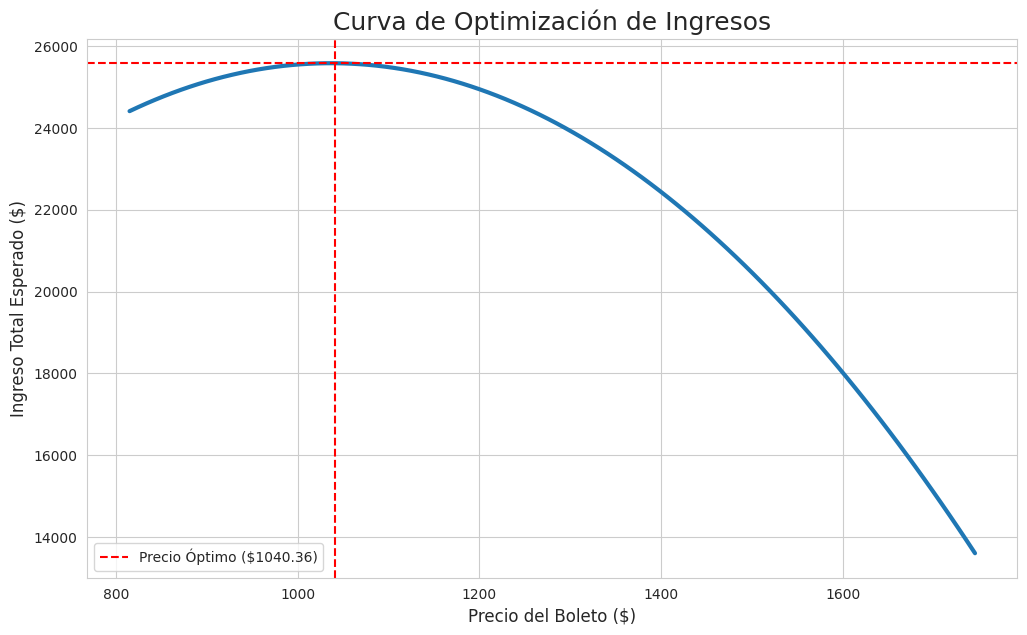

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Ejecutando la simulación final ---")

# --- PASO A: SELECCIONAR UN VIAJE DE EJEMPLO CRUDO ---
# Tomamos una muestra aleatoria directamente de df_viajes
viaje_crudo = df_viajes.sample(1, random_state=42)
tarifa_base_ejemplo = viaje_crudo['tarifa_promedio'].iloc[0]


# --- PASO B: APLICAR LA MISMA PREPARACIÓN QUE AL MODELO ORIGINAL ---
# 1. Seleccionar solo las columnas predictoras que usamos para entrenar
X_ejemplo = viaje_crudo[columnas_predictoras]

# 2. Aplicar One-Hot Encoding
X_ejemplo_codificado = pd.get_dummies(X_ejemplo, columns=columnas_categoricas, drop_first=True)

# 3. **LA CLAVE**: Alinear las columnas del ejemplo con las del modelo final
# Esto añade las columnas que faltan (con valor 0) y asegura el orden correcto.
X_ejemplo_alineado = X_ejemplo_codificado.reindex(columns=X_final.columns, fill_value=0)

# 4. Escalar los datos con el MISMO escalador que usamos antes
X_ejemplo_final = scaler.transform(X_ejemplo_alineado)


# --- PASO C: PREDECIR LA DEMANDA BASE (FASE 1) ---
# Ahora la predicción funcionará porque las columnas coinciden
demanda_predicha_base = best_model.predict(X_ejemplo_final)[0]


# --- PASO D: EJECUTAR EL OPTIMIZADOR (FASE 3) ---
resultado_optimizacion = encontrar_precio_optimo(
    demanda_base=demanda_predicha_base,
    tarifa_base=tarifa_base_ejemplo,
    elasticidad=-1.28 # El valor que obtuvimos en la Fase 2
)

precio_final = resultado_optimizacion['precio_optimo']
ingreso_final = resultado_optimizacion['ingreso_maximo']


# --- PASO E: MOSTRAR RESULTADOS Y GRÁFICO ---
print(f"\nPara un viaje con una demanda base predicha de {demanda_predicha_base:.0f} boletos (a ${tarifa_base_ejemplo:.2f}):")
print("\n--------------------------------------------------")
print(f"  El precio óptimo recomendado es: ${precio_final:.2f}")
print(f"  Con este precio, el ingreso esperado se maximiza a: ${ingreso_final:,.2f}")
print("--------------------------------------------------")

# Graficar
df_simulacion = resultado_optimizacion['datos_simulacion']
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.lineplot(data=df_simulacion, x='precio_probado', y='ingreso_esperado', linewidth=3)
plt.axvline(x=precio_final, color='red', linestyle='--', label=f'Precio Óptimo (${precio_final:.2f})')
plt.axhline(y=ingreso_final, color='red', linestyle='--')
plt.title('Curva de Optimización de Ingresos', fontsize=18)
plt.xlabel('Precio del Boleto ($)', fontsize=12)
plt.ylabel('Ingreso Total Esperado ($)', fontsize=12)
plt.legend()
plt.show()

### **5.3.1 Analisis de Resultado**

El resultado es muy interesante y demuestra el poder de este análisis. Para este viaje en particular, aunque la tarifa base era de ~  $1164 , el motor de optimización recomienda bajar el precio a  1040.36 pesos.

Esto es una consecuencia directa de la demanda elástica que se descubrio en la Fase 2. El modelo calculó que la ganancia de pasajeros que obtendrías al bajar el precio es tan significativa que compensa la reducción de la tarifa, generando un ingreso total mayor ($25,581.89). El gráfico muestra esto claramente: el punto más alto de la curva de ingresos  se encuentra en ese precio recomendado.

**Observación:**

* **El Escenario de Alta Demanda: Cuando la Capacidad es el Límite**
Ahora, imaginemos el caso contrario, como un viaje en un puente festivo:

* **Predicción Alta:** El modelo de Fase 1 (XGBoost) predice una demanda base muy alta, digamos 35 pasajeros para un autobús con capacidad de 36.

* **La Lógica del Optimizador:** La función encontrar_precio_optimo se ejecuta. Ahora su objetivo no es "llenar asientos" (porque ya se espera que se llenen), sino maximizar el valor de cada uno de esos asientos.

* **El Cálculo Clave:** La función, usando la elasticidad de -1.28, simula qué pasaría si sube el precio.

  Sabe que si sube el precio un 10%, la demanda bajará un 12.8% (de 35 a ~30 pasajeros).

  Entonces compara los ingresos potenciales:

  * Ingreso Base: (35 pasajeros)($1,150(_tarifa base_))  = 40,250 pesos.

  * Ingreso Nuevo: (30 pasajeros)($1,265(tarifa +10%)) = 37,950 pesos

En este caso, subir un 10% fue demasiado. Pero la función prueba cientos de puntos intermedios y encontrará el "punto maximo". Descubrirá que puede subir el precio, por ejemplo, a 1,220 pesos. A ese precio, la demanda quizás baje a solo 34 pasajeros, pero el ingreso total será de $41,480, que es mayor que el ingreso original.

En resumen: Cuando la demanda esperada es alta, el sistema entiende que puede permitirse perder a los pasajeros más sensibles al precio, porque los pasajeros que están dispuestos a pagar más generarán un ingreso total superior.

Por lo tanto, en un escenario de alta demanda, tu sistema correctamente recomendaría un aumento de tarifa.

## **6. Conclusiones y cierre de Fase Dinámica**

El trabajo realizado en este notebook ha completado con éxito las fases fundamentales para la creación de una estrategia de precios dinámicos. Los entregables principales de este análisis son:

* **Un Modelo Predictivo de Demanda:** Un modelo de XGBoost optimizado (best_model) capaz de pronosticar la cantidad de pasajeros para un viaje con un R² de 62.03% y un MAE de 4.83 boletos.

* **Un Cálculo de la Elasticidad del Precio:** Se ha estimado una elasticidad precio de la demanda promedio de -1.28, lo que confirma que el mercado es sensible a los cambios de precio.

* **Un Motor de Optimización de Ingresos:** La función encontrar_precio_optimo sirve como el cerebro de la estrategia, capaz de recomendar el precio único que maximiza el ingreso para un viaje determinado, basándose en la demanda y la elasticidad.

Este sistema de **precio dinámico** es la base indispensable sobre la cual se construirá la siguiente capa de inteligencia: el precio personalizado.


## **7. Proximos pasos**


* **Hacia la Tarifa Personalizada:**
El trabajo realizado hasta este punto sienta las bases para el siguiente nivel de sofisticación: la tarifa personalizada. El objetivo ahora es dejar de ofrecer un único precio óptimo por viaje y empezar a ofrecer un precio óptimo para cada tipo de cliente.

A continuación, se detalla el plan de acción sugerido para que el equipo pueda tomar este trabajo como punto de partida.

* **Paso 1: Segmentación de Clientes (Clustering)**
El primer paso es agrupar a los clientes en segmentos con comportamientos de compra similares.

  * **Objetivo:** Crear clústeres de clientes.

  * **Datos a Utilizar:** Se debe volver al DataFrame original (antes de la agregación, df_filtrado_kms) y utilizar características a nivel de transacción para el clustering. Algunas variables sugeridas son:

     * TIPO_PASAJERO (Adulto, Menor, INAPAM, etc.)

     * AREA_VENTA (Venta Web, Taquilla, etc.)

     * dias_anticipacion (La que creamos en el último paso)

     * dia_semana

    * clase_servicio

  * **Algoritmo Sugerido:** K-Means es un excelente punto de partida para este tipo de segmentación.

* **Paso 2:** Caracterización de Segmentos (Creación de "Personas")
Una vez creados los clústeres, es fundamental analizarlos para entender qué representa cada uno y darles un nombre de "persona". Por ejemplo, se podrían encontrar segmentos como:

  * **"Los Planificadores":** Compran con mucha anticipación.

   * **"Viajeros de Negocios":*** Compran entre semana, con poca anticipación y prefieren servicios de mayor categoría.

   * **"Cazadores de Ofertas":** Compran principalmente en línea (VENTA WEB SERVICES) y son sensibles a las promociones.

Paso 3: Cálculo de Elasticidad por Segmento
Este es el paso más importante para la personalización. En lugar de tener una única elasticidad de -1.28 para todos, se debe recalcular la elasticidad del precio para cada segmento.

Resultado Esperado: Se esperaría que los "Viajeros de Negocios" sean inelásticos (ej. -0.5), mientras que los "Cazadores de Ofertas" sean muy elásticos (ej. -2.5).

Paso 4: Implementación del Motor de Precios Personalizados
Finalmente, se modifica el motor de optimización de la Fase 3. En lugar de realizar un único cálculo por viaje, el motor ahora deberá:

Usar el modelo de demanda de la Fase 1 para predecir la demanda total del viaje.

Estimar cuántos pasajeros de cada segmento se esperan en ese viaje.

Para cada segmento, ejecutar la función encontrar_precio_optimo utilizando la elasticidad específica de ese segmento.

El resultado final ya no será un único precio recomendado, sino múltiples precios personalizados para un mismo viaje, optimizados para maximizar el ingreso total considerando el comportamiento de cada tipo de cliente.